In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns



Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')
Preprocessing complete. Shape of preprocessed training data: (356105, 154)


C:\Users\44757\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


K-means Accuracy: 0.2531
[[19848 64041]
 [ 2452  2686]]
              precision    recall  f1-score   support

           0       0.89      0.24      0.37     83889
           1       0.04      0.52      0.07      5138

    accuracy                           0.25     89027
   macro avg       0.47      0.38      0.22     89027
weighted avg       0.84      0.25      0.36     89027


KNN Accuracy: 0.9421
[[83448   441]
 [ 4718   420]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     83889
           1       0.49      0.08      0.14      5138

    accuracy                           0.94     89027
   macro avg       0.72      0.54      0.56     89027
weighted avg       0.92      0.94      0.92     89027


Logistic Regression Accuracy: 0.9455
[[83000   889]
 [ 3967  1171]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     83889
           1       0.57      0.23      0.33      5138

    

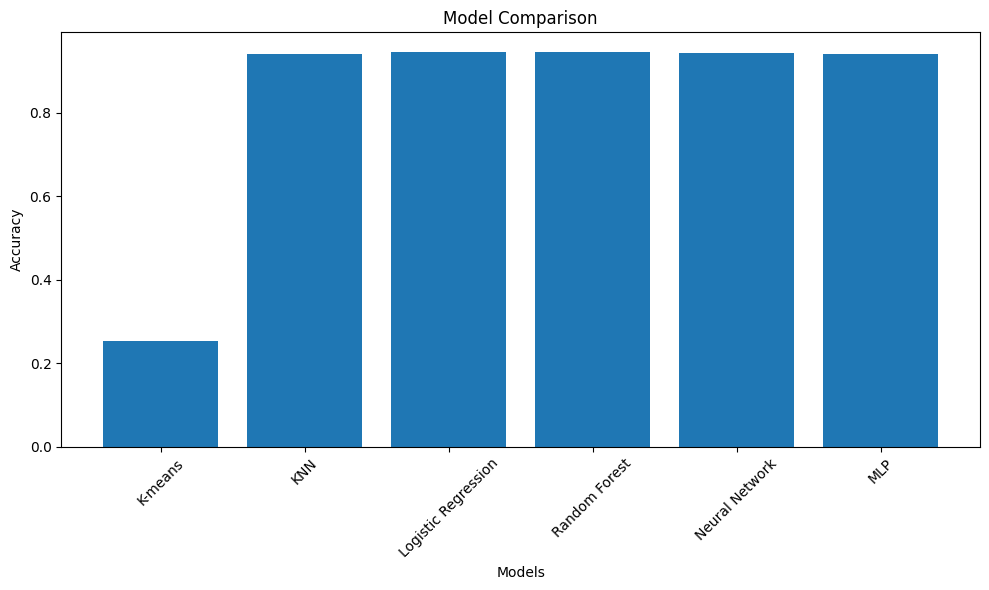

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv(r"C:\Users\44757\Documents\GitHub\IntrotoAI\cleaned_data.csv")

# Display the column names
print(data.columns)

# Assuming 'HadHeartAttack' is the target variable, adjust as necessary
target_column = 'HadHeartAttack'

# Preprocessing
X = data.drop(target_column, axis=1)
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print("Preprocessing complete. Shape of preprocessed training data:", X_train_preprocessed.shape)

# Model training and evaluation
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define models
models = {
    'K-means': KMeans(n_clusters=2, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Neural Network': Sequential([
        Dense(64, activation='relu', input_dim=X_train_preprocessed.shape[1]),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    'MLP': MLPClassifier(random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    if name == 'K-means':
        model.fit(X_train_preprocessed)
        y_pred = model.predict(X_test_preprocessed)
    elif name == 'Neural Network':
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_preprocessed.toarray(), y_train, epochs=50, batch_size=32, verbose=0)
        y_pred = (model.predict(X_test_preprocessed.toarray()) > 0.5).astype(int).flatten()
    else:
        model.fit(X_train_preprocessed, y_train)
        y_pred = model.predict(X_test_preprocessed)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

# Visualize results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()